<a href="https://colab.research.google.com/github/Eeman1113/large-scale-energy-anomaly-detection/blob/main/large_scale_energy_anomaly_detection_lead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="background-color:#35ffff
;font-family:newtimeroman;font-size:225%;text-align:center;border-radius: 30px 50px;"> 📈 Time Series Outlier and Anomaly Detection 📈</h1><a id=0></a>

# Time-Series-Anomaly-Detection

# Introduction:

Anomaly detection is the process of discover the event or the points which are unexpected at 
this position of the dataset or deviates from the normal pattern of the dataset. 
So, the detection of those points very important; because it give us an early step to make the 
emergency movements to control that un usual change. 
We used many techniques to reach best one to apply it on our way of the project. 

 
# Anomaly Detection Methods: 
The outlairs and anomaly detection different methods:

<li><a href="#m1">1- Tukey’s box plot method</a>
<li><a href="#m2">2- Isolation forest.</a>
<li><a href="#m3">3- Anomly based on Machine learning Predication.</a>

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from datetime import datetime, timezone
import datetime
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings('ignore')

In [6]:
!pip3 install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
df = pd.read_csv('/content/train-2.csv',parse_dates= ["timestamp"])

In [12]:
df_name = df.iloc[:,[0,2]].columns

In [13]:

# there is a problem with missing values so i will try to handel it.

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
df_clean = my_imputer.fit_transform(df.iloc[:,[0,2]])

df_clean = pd.DataFrame(df_clean,columns = df_name)

missing_val_count_by_column = (df_clean.isnull().sum())
print(missing_val_count_by_column)

building_id      0
meter_reading    0
dtype: int64


In [14]:
df.iloc[:,[1,3]].shape

(1749494, 2)

In [15]:
df_clean.shape

(1749494, 2)

In [16]:
df = pd.concat([df.iloc[:,[1,3]], df_clean], axis=1)


In [17]:
df.head()

,timestamp,anomaly,building_id,meter_reading
0,2016-01-01,0,1.0,179.901838
1,2016-01-01,0,32.0,179.901838
2,2016-01-01,0,41.0,179.901838
3,2016-01-01,0,55.0,179.901838
4,2016-01-01,0,69.0,179.901838


In [18]:
df.columns

Index(['timestamp', 'anomaly', 'building_id', 'meter_reading'], dtype='object')

In [19]:
df = df[['timestamp',  'building_id', 'meter_reading','anomaly']]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   building_id    float64       
 2   meter_reading  float64       
 3   anomaly        int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 53.4 MB


In [21]:
df['building_id'] = df['building_id'].apply(np.int64)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 4 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   building_id    int64         
 2   meter_reading  float64       
 3   anomaly        int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 53.4 MB


## <h3> 1- Tukey’s box plot method</h3>
<a id="m1"></a>


in this method we depend on the pox plot to determine if the point is outlier or not and not 
only that it gives us the ability to decide if this outlier is possible or probable outlier point; by 
calculate the following parameters: 
- 25th percentile (Q1) 
- 75th percentile (Q3) 
- interquartile range (IQR = Q3 – Q1) 
- Lower inner fence: Q1 – (1.5 * IQR) 
- Upper inner fence: Q3 + (1.5 * IQR) 
- Lower outer fence: Q1 – (3 * IQR) 
- Upper outer fence: Q3 + (3 * IQR) 

Then decide if the point between the inner fence and outer fence it considered as a possible 
outlier point. And if the point lies outside the outer fence, it will be considered as probable 
outlier. 

#### First apply on a random grid

In [23]:
df.columns

Index(['timestamp', 'building_id', 'meter_reading', 'anomaly'], dtype='object')

In [24]:
df['building_id'].value_counts()

1       8784
1278    8784
1283    8784
1284    8784
1285    8784
        ... 
848     8351
844     7959
827     7799
1232    7779
1353    7471
Name: building_id, Length: 200, dtype: int64

In [25]:
df.set_index('timestamp',inplace=True)

In [26]:
df.groupby("building_id").get_group(108)

,building_id,meter_reading,anomaly
timestamp,,,
2016-01-01 00:00:00,108,179.901838,0
2016-01-01 01:00:00,108,182.531000,1
2016-01-01 02:00:00,108,1.000000,1
2016-01-01 03:00:00,108,1.000000,1
2016-01-01 04:00:00,108,1.000000,1
...,...,...,...
2016-12-31 19:00:00,108,179.500000,0
2016-12-31 20:00:00,108,178.000000,0
2016-12-31 21:00:00,108,176.500000,0


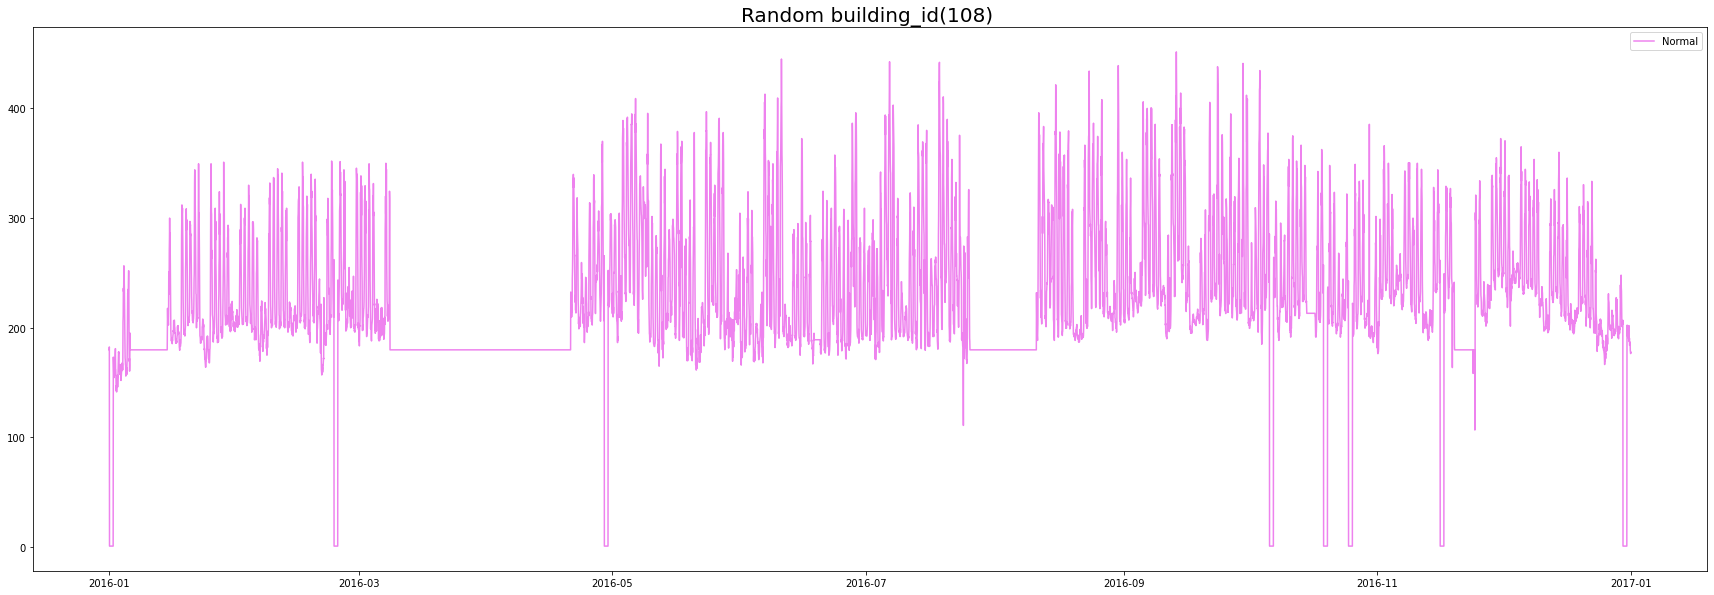

In [27]:
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(df.groupby("building_id").get_group(108)['meter_reading'].index, 
        df.groupby("building_id").get_group(108)['meter_reading'], color='Violet', label = 'Normal')
ax.set_title('Random building_id(108) ', fontsize=20)
plt.legend()
plt.show();

In [29]:
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss


In [30]:
random_building_id = df.groupby("building_id").get_group(108)

probable_outliers_tm, possible_outliers_tm = tukeys_method(random_building_id, "meter_reading")

print(probable_outliers_tm)
print("_________________________________________________________________________________")
print(possible_outliers_tm)

[]
_________________________________________________________________________________
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2964, 2965, 2968, 2988, 2989, 2990, 2991, 2992, 3013, 3014, 3015, 3016, 3017, 3035, 3036, 3037, 3038, 3039, 3040, 3108, 3280, 3377, 3445, 3446, 3447, 3448, 3449, 3518, 3519, 3520, 3521, 3544, 3780, 3782, 3783, 3784, 3785, 3786, 3857, 3858, 3877, 3878, 3879, 3880, 3881, 3882, 4289, 4290, 4308, 4309, 4310, 4311, 4312, 4479, 4480, 4481, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4524, 4525, 4526, 4527, 4528, 4669, 4718, 4789, 4790, 4791, 4792, 4793, 4794, 4813, 4814, 4815, 4837, 4908, 5365, 5369, 5393, 5460, 5461, 5462, 5463, 5464, 5465, 5487, 5537, 5653, 5654, 

In [31]:
len(probable_outliers_tm)

0

In [32]:
len(possible_outliers_tm)

352

In [33]:
anomaly = pd.DataFrame(possible_outliers_tm)
anomaly['Anomaly'] = 1
anomaly.set_index(0, inplace=True)

In [34]:
random_building_id = pd.concat([random_building_id.reset_index(), anomaly], axis=1)

In [35]:
random_building_id

,timestamp,building_id,meter_reading,anomaly,Anomaly
0,2016-01-01 00:00:00,108,179.901838,0,NaN
1,2016-01-01 01:00:00,108,182.531000,1,NaN
2,2016-01-01 02:00:00,108,1.000000,1,1.0
3,2016-01-01 03:00:00,108,1.000000,1,1.0
4,2016-01-01 04:00:00,108,1.000000,1,1.0
...,...,...,...,...,...
8779,2016-12-31 19:00:00,108,179.500000,0,NaN
8780,2016-12-31 20:00:00,108,178.000000,0,NaN
8781,2016-12-31 21:00:00,108,176.500000,0,NaN
8782,2016-12-31 22:00:00,108,178.000000,0,NaN


In [36]:
random_building_id['Anomaly'] = random_building_id['Anomaly'].replace(np.nan, False)
random_building_id['Anomaly'] = random_building_id['Anomaly'].replace(1.0, True)

In [37]:
random_building_id['Anomaly'].value_counts()

False    8432
True      352
Name: Anomaly, dtype: int64

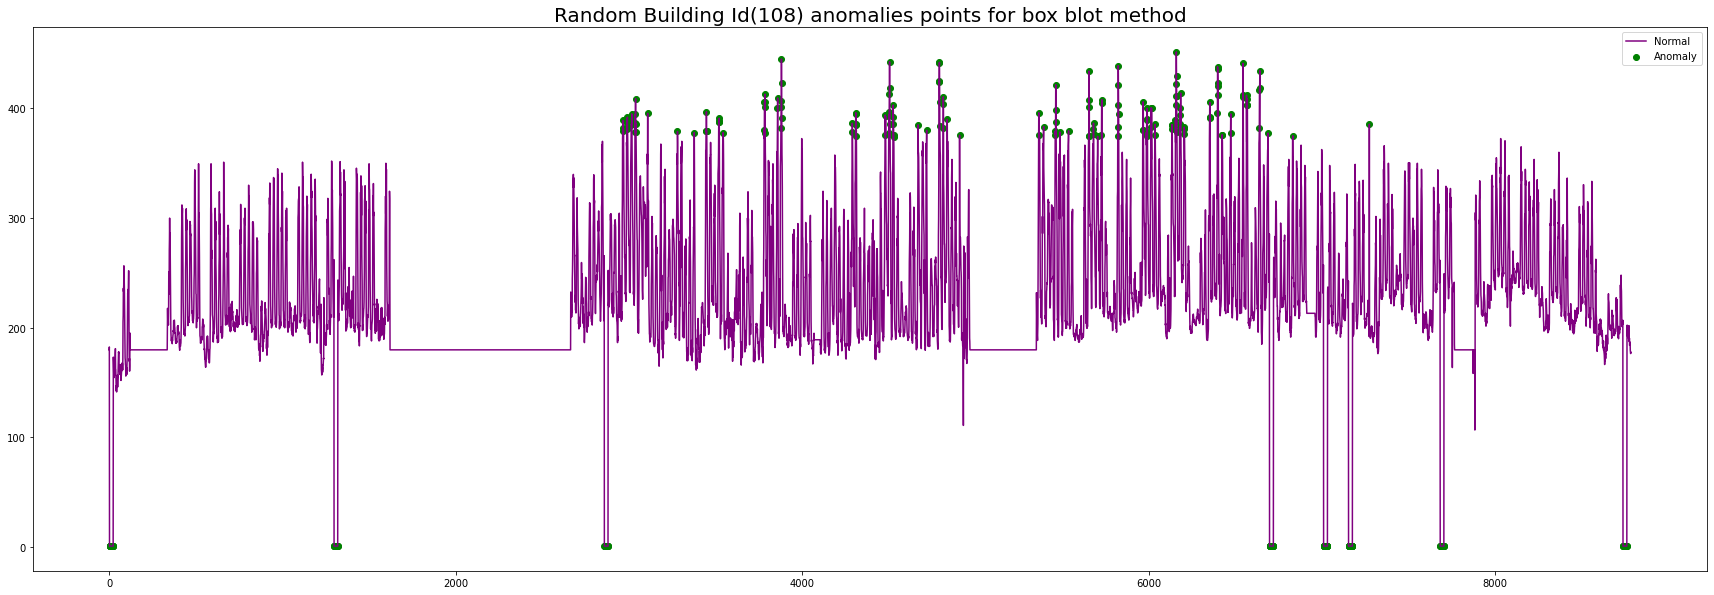

In [41]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = random_building_id.loc[random_building_id['Anomaly'] == True, ['meter_reading']] 

ax.plot(random_building_id.index, random_building_id['meter_reading'], color='Purple', label = 'Normal')
ax.scatter(anomaly.index,anomaly['meter_reading'], color='green', label = 'Anomaly')
ax.set_title('Random Building Id(108) anomalies points for box blot method', fontsize=20)
plt.legend()
plt.show();

In [ ]:
# fig1 = px.line(random_building_id,  y="meter_reading")
# fig1.update_traces(line=dict(color = 'magenta'))

# anomaly = random_building_id.loc[random_building_id['Anomaly'] == True, ['meter_reading']] 
# fig2 = px.scatter(anomaly,y="meter_reading")

# fig3 = go.Figure(data=fig1.data + fig2.data)
# fig3.update_layout(title="Random Building Id(108) anomalies points for box blot method")
# fig3.show()

In [ ]:
print("my first model predication for only one building has accurcy ",round((random_building_id[random_building_id['anomaly'] == random_building_id['Anomaly']].shape[0]/random_building_id.shape[0])*100,2),"%")

my first model predication for only one building has accurcy  96.69 %


#### Second apply on all grids

In [ ]:
All_buildings = df.groupby("building_id")
buildings = list(All_buildings.groups.keys())

In [ ]:
data=[]
for building in buildings:
    All_buildings = df.groupby("building_id").get_group(building)
    data.append(All_buildings)

In [ ]:
x=len(buildings)
x

200

In [ ]:
buildings

[1,
 32,
 41,
 55,
 69,
 79,
 82,
 91,
 107,
 108,
 111,
 112,
 117,
 118,
 119,
 121,
 136,
 137,
 139,
 141,
 144,
 147,
 148,
 149,
 159,
 171,
 173,
 174,
 181,
 183,
 190,
 235,
 238,
 240,
 246,
 247,
 248,
 253,
 254,
 263,
 270,
 275,
 276,
 278,
 290,
 293,
 312,
 318,
 335,
 345,
 356,
 423,
 439,
 492,
 534,
 560,
 623,
 653,
 657,
 658,
 666,
 667,
 673,
 675,
 677,
 680,
 683,
 685,
 687,
 693,
 697,
 698,
 701,
 708,
 710,
 721,
 722,
 729,
 730,
 732,
 739,
 742,
 801,
 827,
 844,
 848,
 879,
 880,
 881,
 882,
 884,
 886,
 887,
 889,
 890,
 892,
 893,
 894,
 895,
 896,
 903,
 905,
 909,
 914,
 919,
 922,
 924,
 925,
 926,
 928,
 929,
 931,
 935,
 936,
 941,
 942,
 945,
 948,
 950,
 952,
 961,
 966,
 967,
 968,
 969,
 970,
 971,
 973,
 974,
 975,
 977,
 978,
 981,
 988,
 990,
 992,
 994,
 996,
 1001,
 1007,
 1068,
 1073,
 1074,
 1106,
 1120,
 1128,
 1137,
 1141,
 1143,
 1147,
 1172,
 1219,
 1225,
 1226,
 1230,
 1232,
 1234,
 1238,
 1239,
 1241,
 1242,
 1245,
 1246,
 1247,

In [ ]:
# test Tukey’s box plot method

data_2=pd.DataFrame()
anomalies= pd.DataFrame()
for i in range(x):
    probable_outliers_tm, possible_outliers_tm = tukeys_method(data[i], "meter_reading")
    
    if len(possible_outliers_tm)==0:
        print("================ NO Anomaly in building number {} ================".format(i+1))
        print("=================================================================")
        anomaly = pd.DataFrame(possible_outliers_tm)
        data_2 = pd.concat([data[i].reset_index(drop=True), anomaly], axis=1)
        anomalies=anomalies.append(data_2)
        continue

    
    anomaly = pd.DataFrame(possible_outliers_tm)
    anomaly['Anomaly'] = 1
    anomaly.set_index(0, inplace=True)

    data_2 = pd.concat([data[i].reset_index(drop=True), anomaly], axis=1)
    
    print("==================== building number {} done ====================".format(i+1))

    print("-" *14,"have number of anomalies points ",data_2['Anomaly'].value_counts().index[0],"-" *14)
    print("=================================================================")
    
    anomalies=anomalies.append(data_2)
    #print(data_2)
    #print(anomalies)

================ NO Anomaly in building number 1 ================
================ NO Anomaly in building number 2 ================
================ NO Anomaly in building number 3 ================
================ NO Anomaly in building number 4 ================
================ NO Anomaly in building number 5 ================
==================== building number 6 done ====================
-------------- have number of anomalies points  1.0 --------------
================ NO Anomaly in building number 7 ================
==================== building number 8 done ====================
-------------- have number of anomalies points  1.0 --------------
================ NO Anomaly in building number 9 ================
==================== building number 10 done ====================
-------------- have number of anomalies points  1.0 --------------
==================== building number 11 done ====================
-------------- have number of anomalies points  1.0 --------------
========

check if the results are true

In [ ]:
anomalies.shape

(1749494, 4)

In [ ]:
df.shape

(1749494, 3)

In [ ]:
anomalies.groupby("building_id").get_group(1323)["Anomaly"].value_counts()

1.0    148
Name: Anomaly, dtype: int64

In [ ]:
anomalies.groupby("building_id").get_group(1007)["Anomaly"].value_counts()

1.0    318
Name: Anomaly, dtype: int64

In [ ]:
df.groupby("building_id").get_group(1007).shape

(8649, 3)

In [ ]:
anomalies.groupby("building_id").get_group(1007).shape

(8649, 4)

In [ ]:
anomalies.reset_index(drop=True,inplace=True)

In [ ]:
anomalies['Anomaly'] = anomalies['Anomaly'].replace(np.nan, False)
anomalies['Anomaly'] = anomalies['Anomaly'].replace(1.0, True)

In [ ]:
anomalies['Anomaly'].value_counts()

False    1679890
True       69604
Name: Anomaly, dtype: int64

In [ ]:
anomalies['anomaly'].value_counts()

0    1712198
1      37296
Name: anomaly, dtype: int64

In [ ]:
anomalies['anomaly'] = anomalies['anomaly'].replace(0, False)
anomalies['anomaly'] = anomalies['anomaly'].replace(1, True)

In [ ]:
anomalies['anomaly'].value_counts()

False    1712198
True       37296
Name: anomaly, dtype: int64

In [ ]:
# fig, ax = plt.subplots(figsize=(30,10))
# ax.plot(df.index, df['meter_reading'], color='blue', label = 'Normal')
# ax.set_title('Total grids', fontsize=20)
# plt.show();

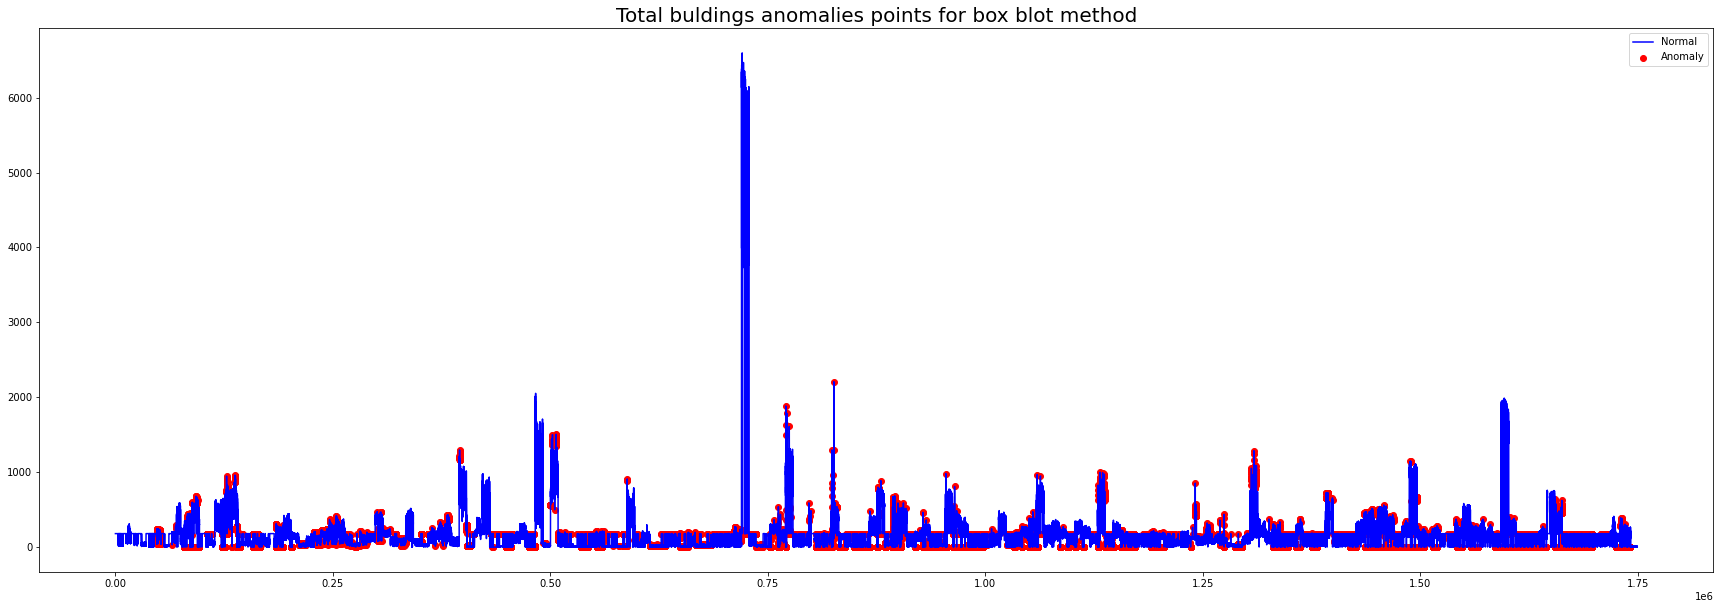

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

anomaly = anomalies.loc[anomalies['Anomaly'] == True, ['meter_reading']] 

ax.plot(anomalies.index, anomalies['meter_reading'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['meter_reading'], color='red', label = 'Anomaly')
ax.set_title('Total buldings anomalies points for box blot method', fontsize=20)
plt.legend()
plt.show();

In [ ]:
# fig1 = px.line(df,  y="meter_reading")
# fig1.update_traces(line=dict(color = 'rgba(250,100,10,0.2)'))
# anomaly = anomalies.loc[anomalies['Anomaly'] == -1, ['meter_reading']] 

# fig2 = px.scatter(anomaly,y='meter_reading')

# fig3 = go.Figure(data=fig1.data + fig2.data)
# fig3.update_layout(title="Total buldings anomalies points for isolation forest")
# fig3.show()

In [ ]:
print("my first model predication has accurcy ",round((anomalies[anomalies['anomaly'] == anomalies['Anomaly']].shape[0]/anomalies.shape[0])*100,2),"%")

my first model predication has accurcy  95.05 %


## <h3> 2- Isolation forest.</h3>
<a id="m2"></a>

In this method we will depend on the detection using some Machine Learning algorithms. In the 
we will depend on Isolation Forest. 

One of those algorithms is the Isolation Forest method. Isolation Forest build using the decision 
trees which depend on the points that go deeper into the tree are not anomalies and points 
which go short distance have big probability to be anomalies, and it is unsupervised learning 
model which used without labeled data. 

The algorithm goes by selecting a sample of the dataset then branch it on the binary tress by 
setting a threshold if the sample we selected is less than this threshold it will be in the left 
branch and if it not it will be in the right branch. This process repeated until we every point in 
the dataset is isolated. 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

#### First apply on a random grid

In [ ]:
random_building_id = df.groupby("building_id").get_group(108)
random_building_id.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2016-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   building_id    8784 non-null   int64  
 1   meter_reading  8784 non-null   float64
 2   anomaly        8784 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 274.5 KB


In [ ]:
# train isolation forest
outliers_fraction = float(.01)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(random_building_id["meter_reading"].values.reshape(-1, 1))
df_data = pd.DataFrame(np_scaled)

model =  IsolationForest(contamination=outliers_fraction)
model.fit(df_data) 

IsolationForest(contamination=0.01)

In [ ]:
# predict isolation forest
Anomaly = model.predict(df_data)

In [ ]:
Anomaly = pd.DataFrame(Anomaly,columns=['Anomaly'])
Anomaly

,Anomaly
0,1
1,1
2,1
3,1
4,1
...,...
8779,1
8780,1
8781,1
8782,1


In [ ]:
random_building_id = pd.concat([random_building_id.reset_index(), Anomaly], axis=1)
random_building_id

,timestamp,building_id,meter_reading,anomaly,Anomaly
0,2016-01-01 00:00:00,108,179.901838,0,1
1,2016-01-01 01:00:00,108,182.531000,1,1
2,2016-01-01 02:00:00,108,1.000000,1,1
3,2016-01-01 03:00:00,108,1.000000,1,1
4,2016-01-01 04:00:00,108,1.000000,1,1
...,...,...,...,...,...
8779,2016-12-31 19:00:00,108,179.500000,0,1
8780,2016-12-31 20:00:00,108,178.000000,0,1
8781,2016-12-31 21:00:00,108,176.500000,0,1
8782,2016-12-31 22:00:00,108,178.000000,0,1


In [ ]:
random_building_id['Anomaly'].value_counts()

 1    8772
-1      12
Name: Anomaly, dtype: int64

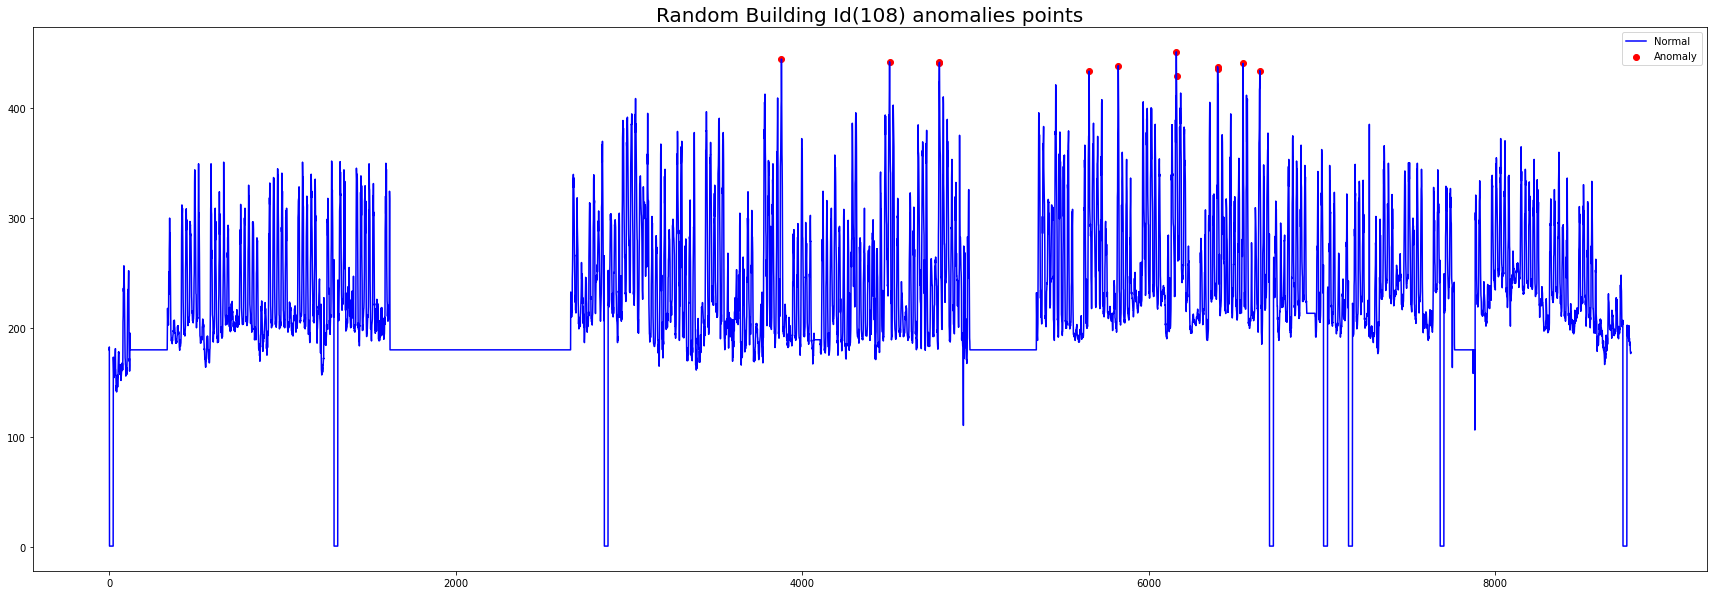

In [ ]:

fig, ax = plt.subplots(figsize=(30,10))

anomaly = random_building_id.loc[random_building_id['Anomaly'] == -1, ['meter_reading']] 

ax.plot(random_building_id.index, random_building_id['meter_reading'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['meter_reading'], color='red', label = 'Anomaly')
ax.set_title('Random Building Id(108) anomalies points', fontsize=20)
plt.legend()
plt.show();

In [ ]:
random_building_id['Anomaly'].value_counts()

 1    8772
-1      12
Name: Anomaly, dtype: int64

In [ ]:
random_building_id['Anomaly'] = random_building_id['Anomaly'].replace(1, 0)
random_building_id['Anomaly'] = random_building_id['Anomaly'].replace(-1, 1)

In [ ]:
print("my first model predication for only one building has accurcy ",round((random_building_id[random_building_id['anomaly'] == random_building_id['Anomaly']].shape[0]/random_building_id.shape[0])*100,2),"%")

my first model predication for only one building has accurcy  96.44 %


#### Second apply on all grids 

In [ ]:
data=[]
for building in buildings:
    All_buildings = df.groupby("building_id").get_group(building)
    data.append(All_buildings)
#data

In [ ]:
data[0]

,building_id,meter_reading,anomaly
timestamp,,,
2016-01-01 00:00:00,1,179.901838,0
2016-01-01 01:00:00,1,179.901838,0
2016-01-01 02:00:00,1,179.901838,0
2016-01-01 03:00:00,1,179.901838,0
2016-01-01 04:00:00,1,179.901838,0
...,...,...,...
2016-12-31 19:00:00,1,20.006000,0
2016-12-31 20:00:00,1,15.364000,0
2016-12-31 21:00:00,1,15.685000,0


In [ ]:
# train isolation forest
full_anomaly = pd.DataFrame()
for i in range (x):
    
    All_buildings = data[i]
    
    outliers_fraction = float(.01)

    scaler = StandardScaler()
    np_scaled = scaler.fit_transform(All_buildings["meter_reading"].values.reshape(-1, 1))
    df_data = pd.DataFrame(np_scaled)

    model =  IsolationForest(contamination=outliers_fraction)
    model.fit(df_data) 
    Anomaly = model.predict(df_data)
    Anomaly = pd.DataFrame(Anomaly,columns=['Anomaly'])
    print("========== building number {} predicted ==========".format(i+1))
    full_anomaly = full_anomaly.append(Anomaly)

========== building number 1 predicted ==========
========== building number 2 predicted ==========
========== building number 3 predicted ==========
========== building number 4 predicted ==========
========== building number 5 predicted ==========
========== building number 6 predicted ==========
========== building number 7 predicted ==========
========== building number 8 predicted ==========
========== building number 9 predicted ==========
========== building number 10 predicted ==========
========== building number 11 predicted ==========
========== building number 12 predicted ==========
========== building number 13 predicted ==========
========== building number 14 predicted ==========
========== building number 15 predicted ==========
========== building number 16 predicted ==========
========== building number 17 predicted ==========
========== building number 18 predicted ==========
========== building number 19 predicted ==========
========== building number 20 predicted 

In [ ]:
full_anomaly.reset_index(inplace= True)
full_anomaly.drop('index', axis=1, inplace=True)
full_anomaly

,Anomaly
0,1
1,1
2,1
3,1
4,1
...,...
1749489,1
1749490,1
1749491,1
1749492,1


In [ ]:
df_full_anomaly = pd.concat([df.reset_index(), full_anomaly], axis=1)
df_full_anomaly

,timestamp,building_id,meter_reading,anomaly,Anomaly
0,2016-01-01 00:00:00,1,179.901838,0,1
1,2016-01-01 00:00:00,32,179.901838,0,1
2,2016-01-01 00:00:00,41,179.901838,0,1
3,2016-01-01 00:00:00,55,179.901838,0,1
4,2016-01-01 00:00:00,69,179.901838,0,1
...,...,...,...,...,...
1749489,2016-12-31 23:00:00,1316,38.844000,0,1
1749490,2016-12-31 23:00:00,1318,202.893000,0,1
1749491,2016-12-31 23:00:00,1319,179.901838,0,1
1749492,2016-12-31 23:00:00,1323,172.000000,0,1


In [ ]:
# fig1 = px.line(df_full_anomaly,  y="meter_reading")
# fig1.update_traces(line=dict(color = 'rgba(250,100,10,0.2)'))
# fig1.update_layout(title="Total buildings")
# fig1.show()

In [ ]:
# fig1 = px.line(df_full_anomaly,  y="meter_reading")
# fig1.update_traces(line=dict(color = 'rgba(250,100,10,0.2)'))
# anomaly = df_full_anomaly.loc[df_full_anomaly['Anomaly'] == -1, ['meter_reading']] 

# fig2 = px.scatter(anomaly,y='meter_reading')

# fig3 = go.Figure(data=fig1.data + fig2.data)
# fig3.update_layout(title="Total buildings anomalies points for isolation forest")
# fig3.show()

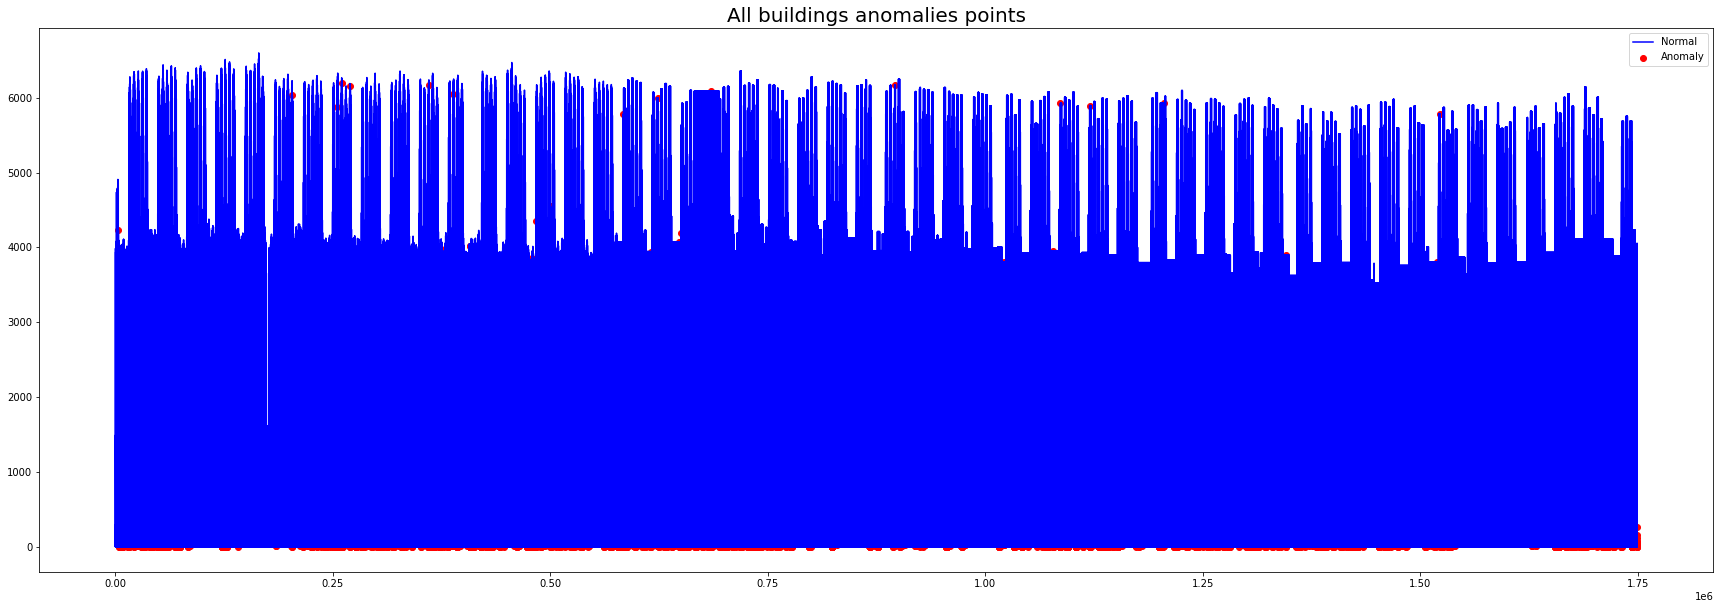

In [ ]:

fig, ax = plt.subplots(figsize=(30,10))

anomaly = df_full_anomaly.loc[df_full_anomaly['Anomaly'] == -1, ['meter_reading']] 

ax.plot(df_full_anomaly.index, df_full_anomaly['meter_reading'], color='blue', label = 'Normal')
ax.scatter(anomaly.index,anomaly['meter_reading'], color='red', label = 'Anomaly')
ax.set_title('All buildings anomalies points', fontsize=20)
plt.legend()
plt.show();

In [ ]:
df_full_anomaly['Anomaly'].value_counts()

 1    1738521
-1      10973
Name: Anomaly, dtype: int64

In [ ]:
df_full_anomaly['Anomaly'] = df_full_anomaly['Anomaly'].replace(1, 0)
df_full_anomaly['Anomaly'] = df_full_anomaly['Anomaly'].replace(-1, 1)

In [ ]:
print("my first model predication for only one building has accurcy ",round((df_full_anomaly[df_full_anomaly['anomaly'] == df_full_anomaly['Anomaly']].shape[0]/df.shape[0])*100,2),"%")

my first model predication for only one building has accurcy  97.27 %


<h3> 3- Anomly based on Machine learning Predication.</h3>
<a id="m3"></a>

In [ ]:
# Load libraries

from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

SEED = 7
np.random.seed(SEED)

In [ ]:
train = pd.read_csv('../input/energy-anomaly-detection/train_features.csv')
test = pd.read_csv('../input/energy-anomaly-detection/test_features.csv')

#take sample to test the code quickly
# train = train.iloc[:train.shape[0]//1500,:]
# test = test.iloc[:test.shape[0]//1500,:]


In [ ]:
train.head()

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


In [ ]:
train.shape

(1749494, 57)

### Feature Engineering

take only important features

In [ ]:
train.columns

Index(['building_id', 'timestamp', 'meter_reading', 'anomaly', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count',
       'air_temperature', 'cloud_coverage', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure', 'wind_direction',
       'wind_speed', 'air_temperature_mean_lag7', 'air_temperature_max_lag7',
       'air_temperature_min_lag7', 'air_temperature_std_lag7',
       'air_temperature_mean_lag73', 'air_temperature_max_lag73',
       'air_temperature_min_lag73', 'air_temperature_std_lag73', 'hour',
       'weekday', 'month', 'year', 'weekday_hour', 'hour_x', 'hour_y',
       'month_x', 'month_y', 'weekday_x', 'weekday_y', 'building_weekday_hour',
       'building_weekday', 'building_month', 'building_hour', 'building_meter',
       'is_holiday', 'gte_hour', 'gte_weekday', 'gte_month', 'gte_building_id',
       'gte_primary_use', 'gte_site_id', 'gte_meter', 'gte_meter_hour',
       'gte_meter_weekday', 'gte_meter_month', 'gte_meter_building

In [ ]:
train = train[['building_id', 'meter_reading', 'square_feet',
       'year_built', 'floor_count','air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure','is_holiday','anomaly']]

test = test[['building_id',  'meter_reading','square_feet',
       'year_built', 'floor_count','air_temperature', 'dew_temperature',
       'precip_depth_1_hr', 'sea_level_pressure','is_holiday']]

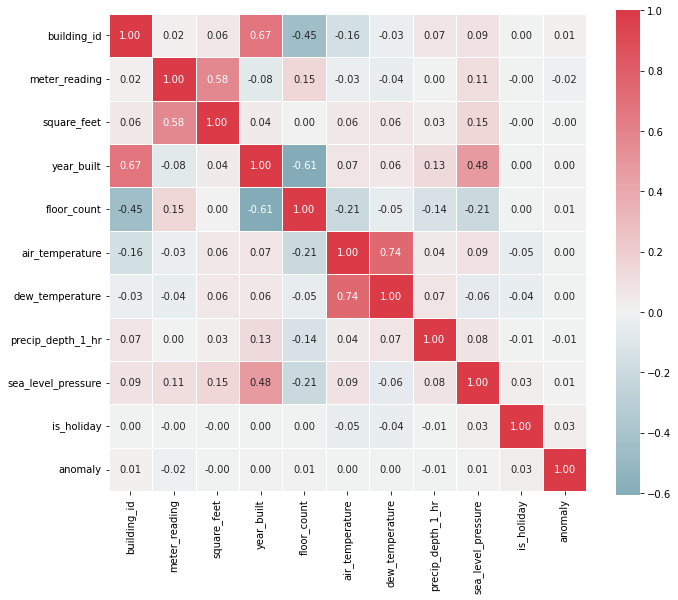

In [ ]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(train,x=True)

 There is no highly corrolated feature in the data set to remove it.

there is a problem with missing values so i will try to handel it.

In [ ]:
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

meter_reading    107653
dtype: int64


In [ ]:

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
df_clean = my_imputer.fit_transform(train.iloc[:,1:2])
df_name =train.iloc[:,1:2].columns
df_clean = pd.DataFrame(df_clean,columns = df_name)

missing_val_count_by_column = (df_clean.isnull().sum())
print(missing_val_count_by_column)

meter_reading    0
dtype: int64


In [ ]:
train["meter_reading"] = df_clean["meter_reading"]

In [ ]:
missing_val_count_by_column = (test.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

meter_reading    94864
dtype: int64


In [ ]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
df_clean = my_imputer.fit_transform(test.iloc[:,1:2])
df_name =test.iloc[:,1:2].columns
df_clean = pd.DataFrame(df_clean,columns = df_name)

missing_val_count_by_column = (df_clean.isnull().sum())
print(missing_val_count_by_column)

meter_reading    0
dtype: int64


In [ ]:
test["meter_reading"] = df_clean["meter_reading"]

### Modeling

In [ ]:
y = train[['anomaly']]
X = train.drop(['anomaly'], axis = 1)

X_train, X_test, y_train, y_test =train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=y)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train.values.ravel())
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred
    

    
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train.values.ravel())
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred

In [ ]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9]
param_grid = dict(n_neighbors=neighbors)

KNN_GridSearch = GridSearch(X_train,y_train,model_KNN,param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(test)

Best: 0.991930 using {'n_neighbors': 2}


In [ ]:
Prediction_KNN = pd.DataFrame(data=Prediction_KNN, columns=["anomaly"])
Prediction_KNN.value_counts()

anomaly
0          1548300
1           252267
dtype: int64

In [ ]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  [1,2,3]
min_samples_leaf_value = [1,2,3]
criterion_value = ["gini", "entropy"]


param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)


model_DT = DecisionTreeClassifier()
DT_RandSearch = GridSearch(X_train,y_train,model_DT,param_grid)
Prediction_DT = DT_RandSearch.BestModelPridict(test)

Best: 0.991404 using {'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2}


In [ ]:
Prediction_DT = pd.DataFrame(data=Prediction_DT, columns=["anomaly"])
Prediction_DT.value_counts()

anomaly
0          1714205
1            86362
dtype: int64

### Ensemble method

In [ ]:
from sklearn.ensemble import VotingClassifier

param = {'n_neighbors': 2}
model1 = KNeighborsClassifier(**param)

param = {'criterion': 'entropy', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 2}
model2 = DecisionTreeClassifier(**param)

model3 = ExtraTreesClassifier()

estimators = [ ('KNN',model1),('DT',model2), ('ET',model3)]
    

In [ ]:
kfold = StratifiedKFold(n_splits=10,shuffle=True, random_state=SEED)
ensemble = VotingClassifier(estimators)

results = cross_val_score(ensemble, X_train,y_train, cv=kfold)
print('Accuracy on train: ',round(results.mean(),4))

ensemble_model = ensemble.fit(X,y)

Prediction_EN = ensemble_model.predict(test)

Accuracy on train:  0.9932


In [ ]:
Prediction_EN = pd.DataFrame(data=Prediction_EN, columns=["anomaly"])
Prediction_EN.value_counts()

anomaly
0          1757028
1            43539
dtype: int64

### Stacked model

In [ ]:
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_blobs
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
#  base-models
def get_models():
    models = list()
#   models.append(LogisticRegression(solver='liblinear'))
    models.append(DecisionTreeClassifier())
#   models.append(SVC(gamma='scale', probability=True))
#   models.append(GaussianNB())
    models.append(KNeighborsClassifier())
#   models.append(AdaBoostClassifier())
    models.append(BaggingClassifier(n_estimators=10))
    models.append(RandomForestClassifier(n_estimators=10))
    models.append(ExtraTreesClassifier(n_estimators=10))
    return models

# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(X, y, models):
    meta_X, meta_y = list(), list()
 
    kfold = KFold(n_splits=10, shuffle=True)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X):
        fold_yhats = list()
        # get data
        train_X, test_X = X[train_ix], X[test_ix]
        train_y, test_y = y[train_ix], y[test_ix]
        meta_y.extend(test_y)
        # fit and make predictions with each sub-model
        for model in models:
            model.fit(train_X, train_y)
            yhat = model.predict_proba(test_X)
            # store columns
            fold_yhats.append(yhat)
        # store fold yhats as columns
        meta_X.append(hstack(fold_yhats))
    return vstack(meta_X), asarray(meta_y)

# fit all base models on the training dataset
def fit_base_models(X, y, models):
    for model in models:
        model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
    model = RandomForestClassifier(n_estimators=10)
    model.fit(X, y)
    return model

# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
    for model in models:
        yhat = model.predict(X)
        acc = accuracy_score(y, yhat)
        print('%s: %.3f' % (model.__class__.__name__, acc*100))

# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
    meta_X = list()
    for model in models:
        yhat = model.predict_proba(X)
        meta_X.append(yhat)
    meta_X = hstack(meta_X)

    return meta_model.predict(meta_X)

In [ ]:
models = get_models()

meta_X, meta_y = get_out_of_fold_predictions(X_train.to_numpy(), y_train.to_numpy(), models)

# fit base models
fit_base_models(X_train, y_train, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_test, y_test, models)
# evaluate meta model
Prediction_ST = super_learner_predictions(test, models, meta_model)

print("="*100)

DecisionTreeClassifier: 99.121
KNeighborsClassifier: 99.165
BaggingClassifier: 99.410
RandomForestClassifier: 99.359
ExtraTreesClassifier: 99.244


In [ ]:
Prediction_ST = pd.DataFrame(data=Prediction_ST, columns=["anomaly"])
Prediction_ST.value_counts()

anomaly
0          1699250
1           101317
dtype: int64

### Submission

In [ ]:
submission_df = pd.read_csv('../input/energy-anomaly-detection/sample_submission.csv')
print(submission_df.shape)
print(Prediction_EN.shape)

(1800567, 2)
(1800567, 1)


In [ ]:
print("KNN",Prediction_KNN.value_counts())
print("DT",Prediction_DT.value_counts())
print("EN",Prediction_EN.value_counts())
print("LR",Prediction_ST.value_counts())

KNN anomaly
0          1548300
1           252267
dtype: int64
DT anomaly
0          1714205
1            86362
dtype: int64
EN anomaly
0          1757028
1            43539
dtype: int64
LR anomaly
0          1699250
1           101317
dtype: int64


In [ ]:
submission_df["anomaly"] = Prediction_KNN['anomaly']
print(submission_df['anomaly'].value_counts())
submission_df.to_csv('my_submission_final_1.csv', index=False)

0    1548300
1     252267
Name: anomaly, dtype: int64


In [ ]:
submission_df["anomaly"] = Prediction_DT['anomaly']
print(submission_df['anomaly'].value_counts())
submission_df.to_csv('my_submission_final_2.csv', index=False)

0    1714205
1      86362
Name: anomaly, dtype: int64


In [ ]:
submission_df["anomaly"] = Prediction_EN['anomaly']
print(submission_df['anomaly'].value_counts())
submission_df.to_csv('my_submission_final_3.csv', index=False)

0    1757028
1      43539
Name: anomaly, dtype: int64


In [ ]:
submission_df["anomaly"] = Prediction_ST['anomaly']
print(submission_df['anomaly'].value_counts())
submission_df.to_csv('my_submission_final_4.csv', index=False)

0    1699250
1     101317
Name: anomaly, dtype: int64


## What is next?
After determining the anomalies points what we should do about them? In the most common 
application like Microsoft anomaly detection, they have some web application to send some 
emails to the concerned persons about the sudden and didn’t expected change, then they take 
the right decision to solve this issue. 

But in our scope here we concerned with if this point is outlier or point of interest. 

<img src="https://github.com/abdallah-elsawy/Time-Series-Anomaly-Detection/blob/main/Outputs/Time-series-outliers.png?raw=true">

So, if the point we detected as outlier is a data that we did not need we will do on it some 
cleaning data processing. But in the other hand some time did not mean if there is some 
unusual event that we didn’t need it. Some event most be important to us because might this 
event will happen in the future so by studying it will make us have the ability to avoid this 
sudden change in the future by handle it by some control flow process. 
Here we after studying those points we will make all anomalies point as a nan value so will 
handle it in the coming part, Missing value imputation. 

### <p style="background-color:gray; font-family:newtimeroman; font-size:200%; text-align:center; border-radius: 10px 100px; color:black; hight:max"> Thanks a lot for having a look at this notebook. If you found this notebook useful, Do Upvote.🎯 </p>